In [2]:
import numpy as np
%matplotlib inline  
import matplotlib.pyplot as plt

   n    &    h     &      E_h     &   E_bound \\ \hline
   9    &   0.100  & 0.05272618   &   1.0417   \\
  19    &   0.050  & 0.01374290   &   0.2604   \\
  39    &   0.025  & 0.00347669   &   0.0651   \\
  79    &   0.013  & 0.00087121   &   0.0163   \\
 159    &   0.006  & 0.00021797   &   0.0041   \\
 319    &   0.003  & 0.00005450   &   0.0010   \\
 639    &   0.002  & 0.00001363   &   0.0003   \\


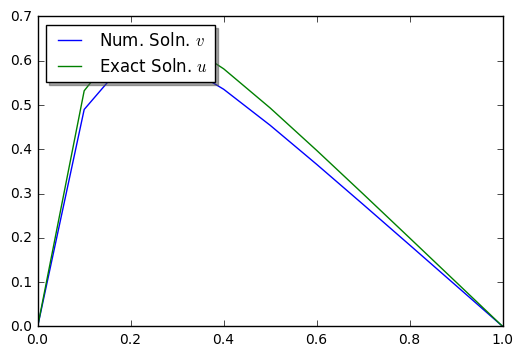

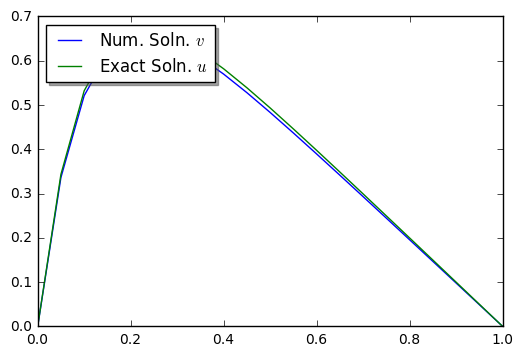

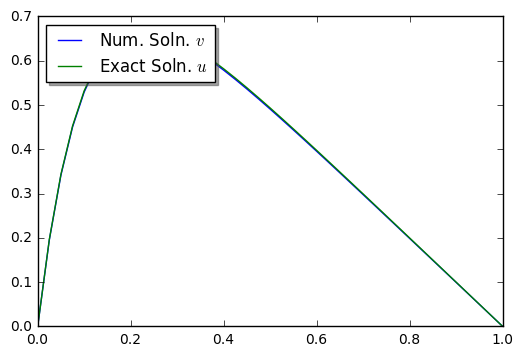

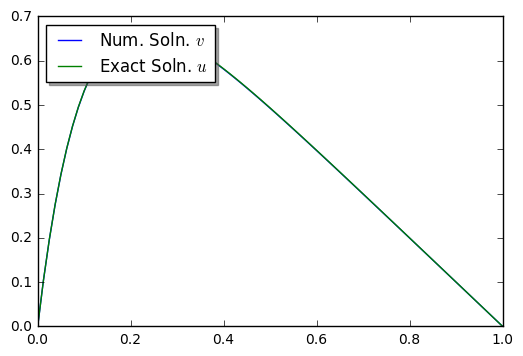

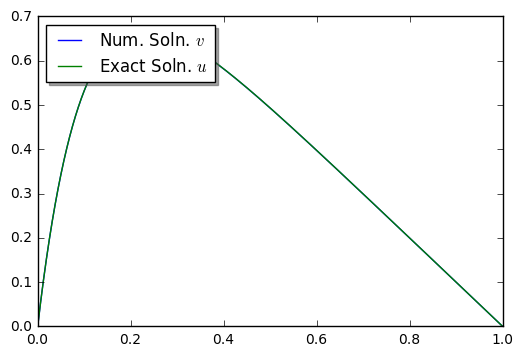

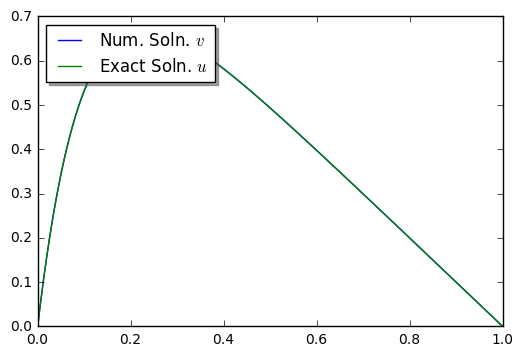

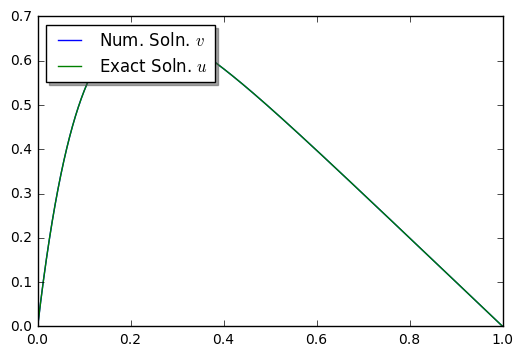

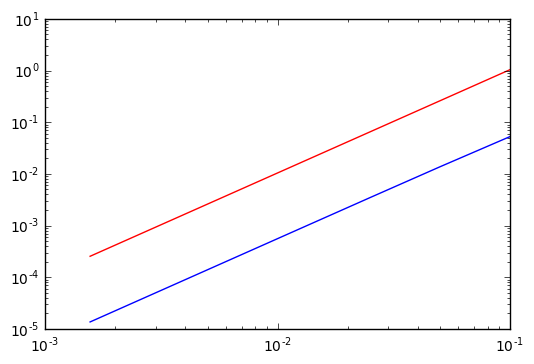

In [14]:
# Part (a)

def f(x):
    z = 100*np.exp(-10*x)
    return z

def f2d(x):
    z = 1E4*np.exp(-10*x)
    return z

def u_exact(x):
    z = 1 - (1-np.exp(-10))*x-np.exp(-10*x)
    return z

n = [9, 19, 39, 79, 159, 319, 639]
E_h = np.zeros(7)
E_bound = np.zeros(7)
h = np.zeros(7)


count = 0
print '   n    &    h     &      E_h     &   E_bound ' + r'\\ \hline'
for n in n:
    A = np.zeros((n,n))
    np.fill_diagonal(A,2)
    A += np.diag(-np.ones(n-1),k=1)
    A += np.diag(-np.ones(n-1),k=-1)
    
    x = np.linspace(0,1,n+2)
    h[count] = x[1]-x[0]
    b = h[count]**2 * f(x) # <----- This line changes

    v = np.zeros(n+2)
    v[1:-1] = np.linalg.solve(A, b[1:-1]) #Numerical soln. using Gaussian elimination

    u = u_exact(x) #Exact soln. <---- This line changes
    
    E_h[count] = np.max(np.abs(u-v))
    '''
    if count == 0:
        print ' %3d    &   %.3f  & %.8f   &         ' % (n, h[count], E_h[count]) + r'   \\'
    else:
        alpha_h[count] = np.log(E_h[count]/E_h[count-1])/np.log(h[count]/h[count-1])
        print ' %3d    &   %.3f  & %.8f   &   %.4f ' % (n, h[count], E_h[count], alpha_h[count]) + r'  \\'
    '''
    E_bound[count] = np.max(np.abs(f2d(x)))/96*h[count]**2
    
    print ' %3d    &   %.3f  & %.8f   &   %.4f ' % (n, h[count], E_h[count], E_bound[count]) + r'  \\'
    plt.figure(count)
    plt.plot(x,v,label='Num. Soln. $v$')
    plt.plot(x,u,label='Exact Soln. $u$')
    plt.legend(loc='upper left', shadow=True)
    
    count +=1
plt.figure(count)
plt.loglog((h),(np.abs(E_h)),'b')
plt.loglog((h),(np.abs(E_bound)),'r')